##### 샘플 소스

```
https://gist.github.com/Lexie88rus/b6e66497a1b4b14aa01cc41e126a7c20
```

##### 원본 이미지

```
https://cutewallpaper.org/download.php?file=/23/aesthetic-sunflower-wallpaper-desktop/2946219066.jpg
```

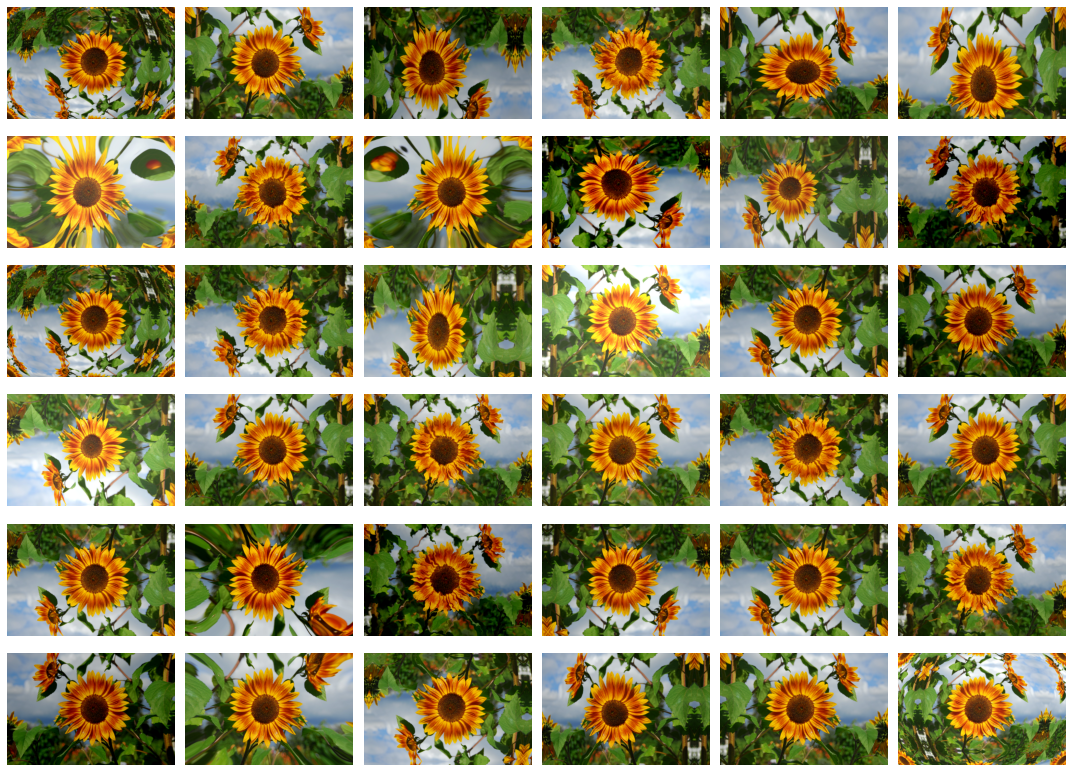

In [17]:
import albumentations as A
import imageio
from matplotlib import pyplot

image = imageio.imread("images/sunflower.jpg")

# Compose a complex augmentation pipeline
augmentation_pipeline = A.Compose(
    [
        A.HorizontalFlip(p = 0.5), # apply horizontal flip to 50% of images
        A.VerticalFlip(p = 0.5), # apply vertical flip to 50% of images
        A.OneOf(
            [
                # apply one of transforms to 50% of images
                A.RandomBrightnessContrast(), # apply random brightness contrast
                A.RandomGamma(), # apply random gamma
            ],
            p = 0.5
        ),
        A.OneOf(
            [
                # apply one of transforms to 50% images
                A.ElasticTransform(
                    alpha = 120,
                    sigma = 120 * 0.05,
                    alpha_affine = 120 * 0.03
                ),
                A.GridDistortion(),
                A.OpticalDistortion(
                    distort_limit = 2,
                    shift_limit = 0.5
                ),
            ],
            p = 0.5
        )
    ],
    p = 1
)

images_aug = [augmentation_pipeline(image = image)['image'] for _ in range(36)]

pyplot.figure(figsize=(15, 11))

for i in range(1, 37):
    pyplot.subplot(6, 6, i)
    pyplot.axis('off')
    pyplot.tight_layout()
    pyplot.imshow(images_aug[i - 1])